In [1]:
#general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#imputation tools
from sklearn.impute import SimpleImputer

In [2]:
# establish directory locations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
data_folder = parent_directory + '/data/'
submissions_folder = parent_directory + '/submissions/'

In [3]:
df = pd.read_csv(data_folder + 'data.csv')

In [21]:
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],mean,median,most_frequent
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,0.175400,0.1754,0.1754
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,-0.041600,-0.0416,-0.0416
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,0.033500,0.0335,0.0335
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,-0.027900,-0.0279,-0.0279
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8,-0.000453,0.0038,0.0334


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   31644 non-null  int64  
 1   author               26620 non-null  object 
 2   geometry             26144 non-null  object 
 3   pressure [MPa]       27192 non-null  float64
 4   mass_flux [kg/m2-s]  26853 non-null  float64
 5   x_e_out [-]          21229 non-null  float64
 6   D_e [mm]             26156 non-null  float64
 7   D_h [mm]             27055 non-null  float64
 8   length [mm]          26885 non-null  float64
 9   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.4+ MB


### Exploratory Data Analysis

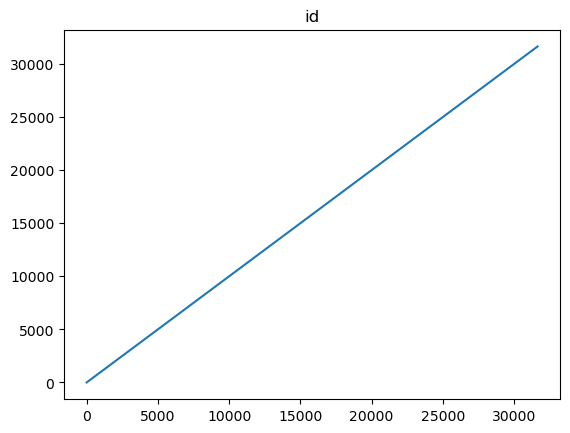

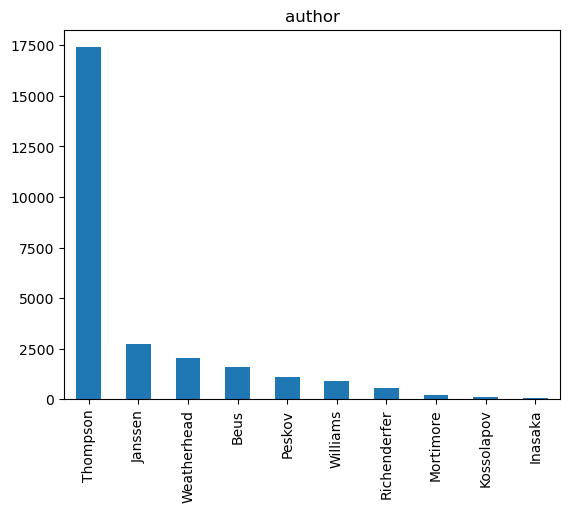

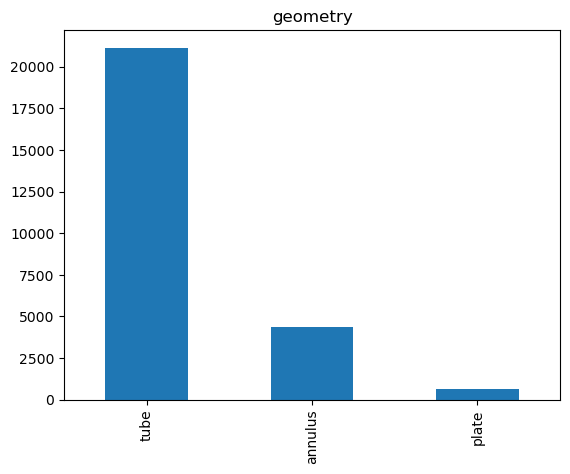

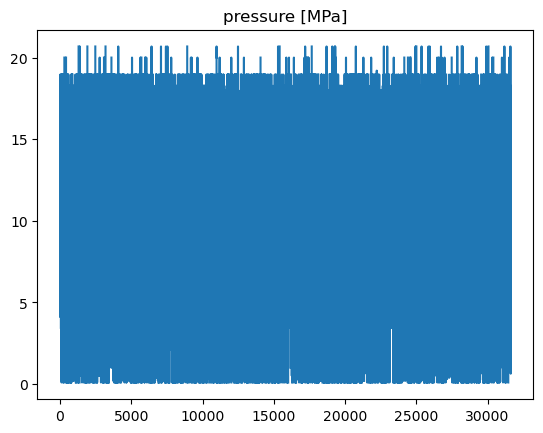

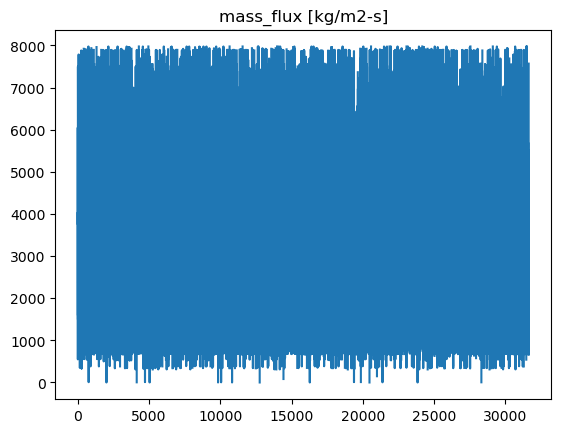

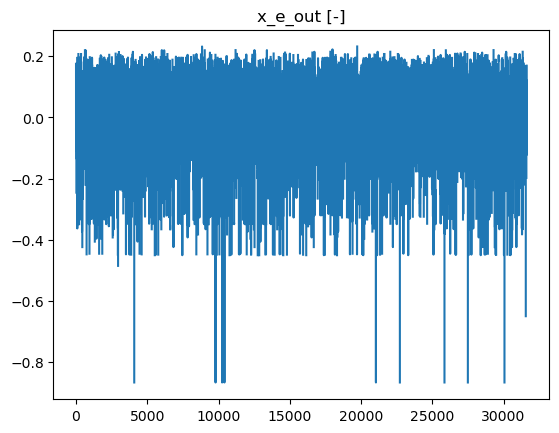

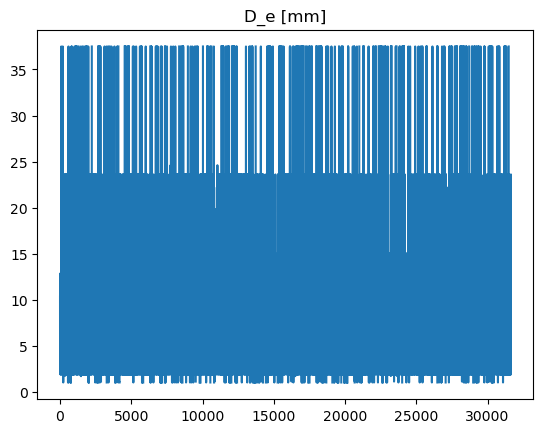

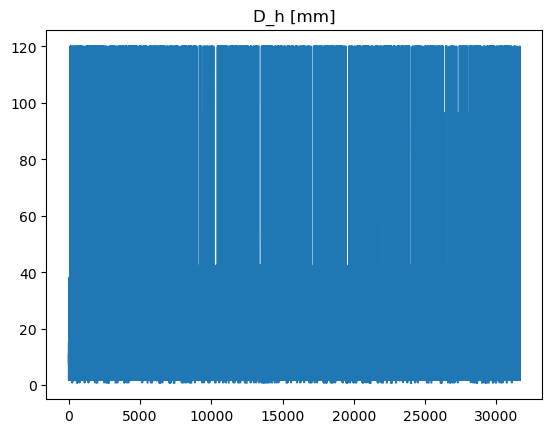

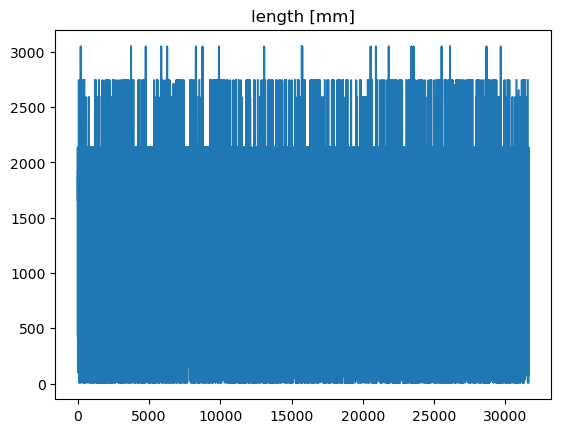

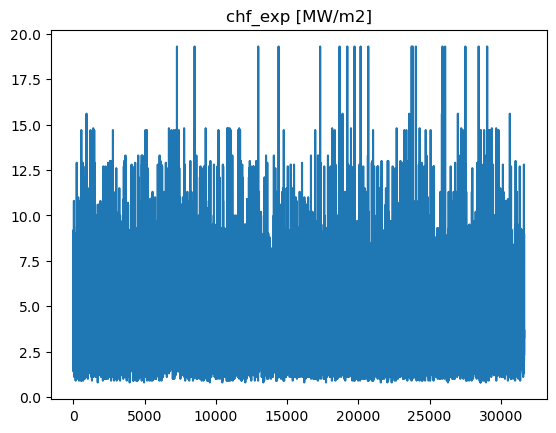

In [6]:
for column in df.columns:
    plt.figure()
    
    if np.issubdtype(df[column].dtype, np.number):
        df[column].plot()
    else:
        value_counts = df[column].value_counts()
        value_counts.plot(kind='bar')
    
    plt.title(column)
    plt.show()

In [7]:
df.corr()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
id,1.000000,0.005451,0.008136,-0.000436,0.003581,0.001305,0.007198,0.002726
pressure [MPa],0.005451,1.000000,-0.195332,-0.193125,-0.468037,-0.498645,-0.090388,-0.259936
mass_flux [kg/m2-s],0.008136,-0.195332,1.000000,-0.168136,0.004676,-0.180331,-0.055095,0.308971
x_e_out [-],-0.000436,-0.193125,-0.168136,1.000000,0.124835,0.063367,0.336840,-0.370580
D_e [mm],0.003581,-0.468037,0.004676,0.124835,1.000000,0.494538,0.314969,0.019495
D_h [mm],0.001305,-0.498645,-0.180331,0.063367,0.494538,1.000000,0.113241,0.055734
length [mm],0.007198,-0.090388,-0.055095,0.336840,0.314969,0.113241,1.000000,-0.276146
chf_exp [MW/m2],0.002726,-0.259936,0.308971,-0.370580,0.019495,0.055734,-0.276146,1.000000


### Baseline Solutions Using Scikit Learn's Simple Imputer

In [17]:
imputer = SimpleImputer(strategy='mean')

df['mean'] = imputer.fit_transform(df[['x_e_out [-]']])

In [19]:
imputer = SimpleImputer(strategy='median')

df['median'] = imputer.fit_transform(df[['x_e_out [-]']])

In [22]:
imputer = SimpleImputer(strategy='most_frequent')

df['most_frequent'] = imputer.fit_transform(df[['x_e_out [-]']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


ValueError: too many values to unpack (expected 2)

### Output Submission Files

In [23]:
df['missing'] = df['x_e_out [-]'].isna()
submission_df = df[df['missing'] == True]

In [24]:
submission_df.shape

(10415, 14)

In [25]:
submission_df[['id', 'mean']].to_csv(submissions_folder + 'V0_SimpleImputer_mean.csv', 
                                     header = ['id', 'x_e_out [-]'], 
                                     index = False)

In [26]:
submission_df[['id', 'median']].to_csv(submissions_folder + 'V0_SimpleImputer_median.csv', 
                                       header = ['id', 'x_e_out [-]'], 
                                       index = False)

In [27]:
submission_df[['id', 'most_frequent']].to_csv(submissions_folder + 'V0_SimpleImputer_most_frequent.csv', 
                                              header = ['id', 'x_e_out [-]'], 
                                              index = False)

### Performance Review

Kaggle reports RMSE's of:
 - 0.101392 for the file V0_SimpleImputer_mean
 - 0.101395 for the file V0_SimpleImputer_median
 - 0.10624 for the file V0_SimpleImputer_most_frequent
 
Imputation via the mean value of the target distibution appears to be the best performing implementation in this experiment. Overall results performed inline with Kaggle's benchmark solution.